In [1]:
# Author : Chand Pasha
# Last Updated : 23-06-2020
# This notebook contains matplotlib library tutorial

Making informative visualizations (sometimes called plots) is one of the most important
tasks in data analysis. It may be a part of the exploratory process—for example,
to help identify outliers or needed data transformations, or as a way of generating
ideas for models.

## Matplotlib
matplotlib is a desktop plotting package designed for creating (mostly twodimensional)
publication-quality plots.matplotlib supports various GUI backends on all
operating systems and additionally can export visualizations to all of the common
vector and raster graphics formats (PDF, SVG, JPG, PNG, BMP, GIF, etc.).

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


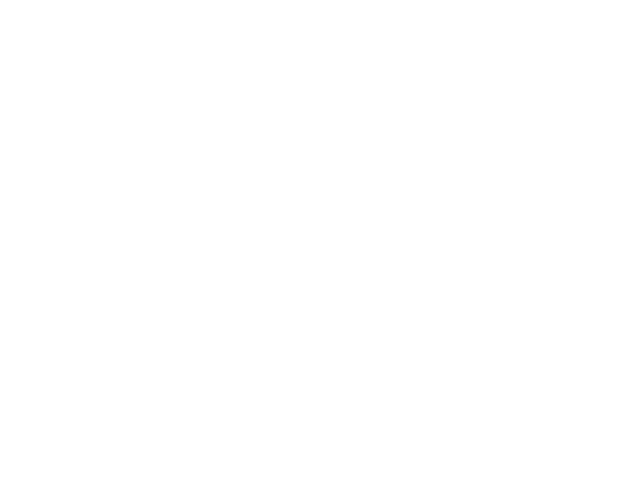

In [4]:
data = np.arange(10)
plt.plot(data)

#### Figures and Subplots
Plots in matplotlib reside within a Figure object. You can create a new figure with
plt.figure. plt.figure has a number of options; notably,
figsize will guarantee the figure has a certain size and aspect ratio if saved to disk.<br>
You can’t make a plot with a blank figure. You have to create one or more subplots
using add_subplot

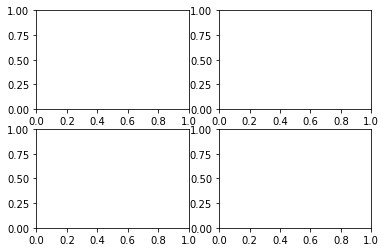

In [5]:
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

When you issue a plotting command like plt.plot([1.5, 3.5, -2, 1.6]), matplotlib
draws on the last figure and subplot used (creating one if necessary), thus hiding
the figure and subplot creation

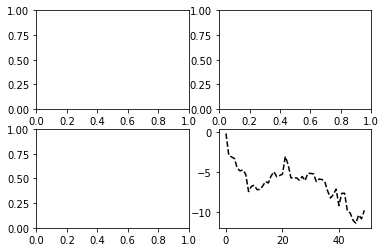

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
plt.plot(np.random.randn(50).cumsum(), 'k--')

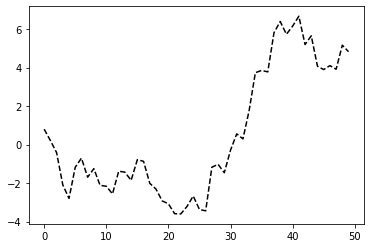

In [7]:
# The 'k--' is a style option instructing matplotlib to plot a black dashed line.
plt.plot(np.random.randn(50).cumsum(), 'k--')

The
objects returned by fig.add_subplot here are AxesSubplot objects, on which you
can directly plot on the other empty subplots by calling each one’s instance method

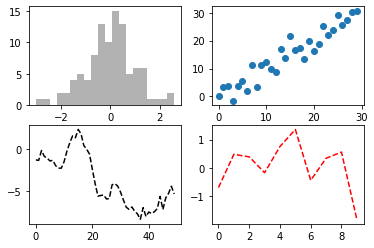

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.hist(np.random.randn(100), bins=20,color='k',alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
ax3.plot(np.random.randn(50).cumsum(), 'k--')
ax4.plot(np.random.randn(10), 'r--')

Creating a figure with a grid of subplots is a very common task, so matplotlib
includes a convenience method, plt.subplots, that creates a new figure and returns
a NumPy array containing the created subplot objects

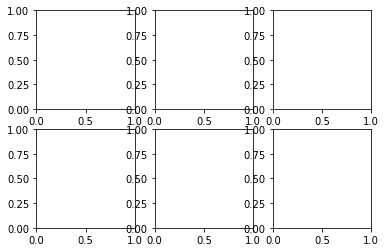

In [9]:
fig, axes = plt.subplots(2,3)

the axes array can be easily indexed like a two-dimensional
array; for example, axes[0, 1]. You can also indicate that subplots should have the
same x- or y-axis using sharex and sharey, respectively <br>
***pyplot.subplots options*** <br>
nrows  : Number of rows of subplots<br>
ncols :  Number of columns of subplots<br>
sharex : All subplots should use the same x-axis ticks (adjusting the xlim will affect all subplots)<br>
sharey :  All subplots should use the same y-axis ticks (adjusting the ylim will affect all subplots)<br>
subplot_kw :  Dict of keywords passed to add_subplot call used to create each subplot<br>
****fig_kw** Additional keywords to subplots are used when creating the figure, such as plt.subplots(2, 2,
figsize=(8, 6))

#### Adjusting the spacing around subplots
1. By default matplotlib leaves a certain amount of padding around the outside of the subplots and spacing between subplots. This spacing is all specified relative to the height and width of the plot, so that if you resize the plot either programmatically or manually using the GUI window, the plot will dynamically adjust itself.
2. You can change the spacing using the subplots_adjust method on Figure objects <br>
subplots_adjust(left=None, bottom=None, right=None, top=None,
wspace=None, hspace=None)

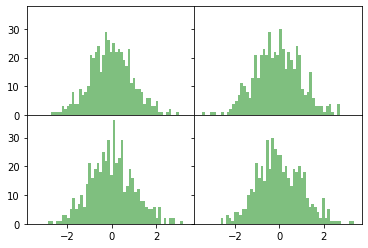

In [10]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins=50, color='g', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

#### Colors, Markers, and Line Styles
1. Matplotlib’s main plot function accepts arrays of x and y coordinates and optionally a string abbreviation indicating color and line style
2. There are a number of color abbreviations provided for commonly used colors, butyou can use any color on the spectrum by specifying its hex code (e.g., '#CECECE').

In [11]:
# ax.plot(x, y, 'g--')
# ax.plot(x, y, linestyle='--', color='g')

Line plots can additionally have markers to highlight the actual data points. Since
matplotlib creates a continuous line plot, interpolating between points, it can occasionally
be unclear where the points lie. The marker can be part of the style string,
which must have color followed by marker type and line style

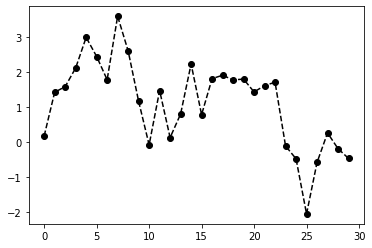

In [12]:
plt.plot(np.random.randn(30).cumsum(),'ko--')

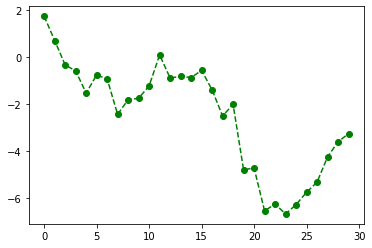

In [13]:
plt.plot(np.random.randn(30).cumsum(), color='g', linestyle='dashed', marker='o')

Here, since we passed the label
arguments to plot, we are able to create a plot legend to identify each line using
plt.legend.

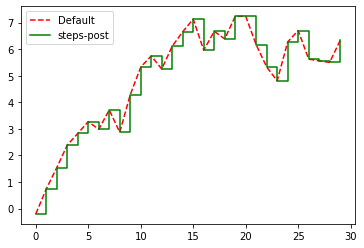

In [14]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'r--', label='Default')
plt.plot(data, 'g-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

#### Ticks, Labels, and Legends
For most kinds of plot decorations, there are two main ways to do things: using the
procedural pyplot interface (i.e., matplotlib.pyplot) and the more object-oriented
native matplotlib API.<br>
The pyplot interface, designed for interactive use, consists of methods like xlim,
xticks, and xticklabels. These control the plot range, tick locations, and tick labels,
respectively. They can be used in two ways <br>
* Called with no arguments returns the current parameter value (e.g., plt.xlim() returns the current x-axis plotting range)
* Called with parameters sets the parameter value (e.g., plt.xlim([0, 10]), sets the x-axis range to 0 to 10)

All such methods act on the active or most recently created AxesSubplot. Each of
them corresponds to two methods on the subplot object itself; in the case of xlim
these are ax.get_xlim and ax.set_xlim

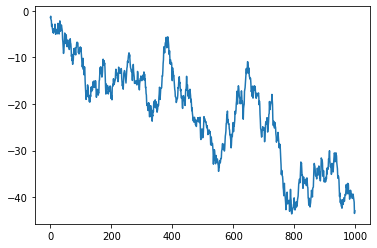

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

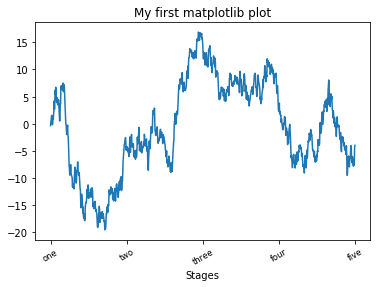

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
# To change the x-axis ticks, it’s easiest to use set_xticks and set_xticklabels
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],rotation=30, fontsize='small')
# set_xlabel gives a name to the x-axis and set_title the subplot title
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')
ax.plot(np.random.randn(1000).cumsum())

Modifying the y-axis consists of the same process, substituting y for x in the above.
The axes class has a set method that allows batch setting of plot properties

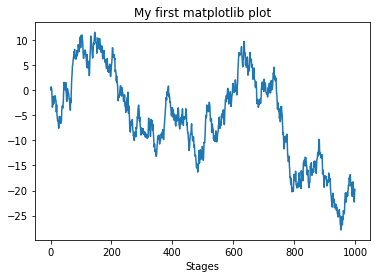

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
props = {
'title': 'My first matplotlib plot',
'xlabel': 'Stages'
}
ax.set(**props)
ax.plot(np.random.randn(1000).cumsum())

#### Adding legends
Legends are another critical element for identifying plot elements. There are a couple
of ways to add one. The easiest is to pass the label argument when adding each piece
of the plot

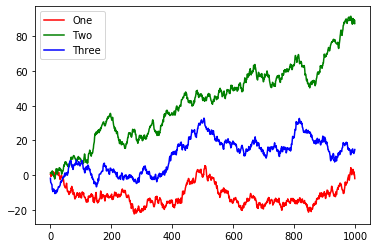

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum(), color='r', label='One')
ax.plot(np.random.randn(1000).cumsum(), color='g', label='Two')
ax.plot(np.random.randn(1000).cumsum(), color='b', label='Three')
# The loc tells matplotlib where to place the plot
# To exclude one or more elements from the legend, pass no label or label='_nolegend_'.
ax.legend(loc='best')

#### Annotations and Drawing on a Subplot
In addition to the standard plot types, you may wish to draw your own plot annotations,
which could consist of text, arrows, or other shapes. You can add annotations
and text using the text, arrow, and annotate functions. text draws text at given
coordinates (x, y) on the plot with optional custom styling

In [19]:
# ax.text(x, y, 'Hello world!', family='monospace', fontsize=10)
# Annotations can draw both text and arrows arranged appropriately

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

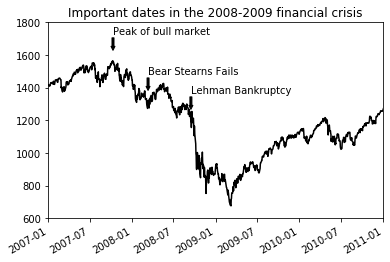

In [20]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

data = pd.read_csv('Datasets/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
(datetime(2007, 10, 11), 'Peak of bull market'),
(datetime(2008, 3, 12), 'Bear Stearns Fails'),
(datetime(2008, 9, 15), 'Lehman Bankruptcy')
]
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
    xytext=(date, spx.asof(date) + 225),
    arrowprops=dict(facecolor='black', headwidth=4, width=2,
    headlength=4),
    horizontalalignment='left', verticalalignment='top')
    
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

the ax.annotate
method can draw labels at the indicated x and y coordinates. We use the set_xlim
and set_ylim methods to manually set the start and end boundaries for the plot
rather than using matplotlib’s default. Lastly, ax.set_title adds a main title to the
plot.

Drawing shapes requires some more care. matplotlib has objects that represent many
common shapes, referred to as patches. Some of these, like Rectangle and Circle, are
found in matplotlib.pyplot, but the full set is located in matplotlib.patches.<br>
To add a shape to a plot, you create the patch object shp and add it to a subplot by
calling ax.add_patch(shp)

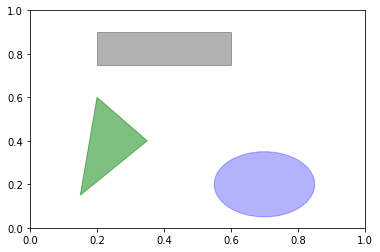

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

#### Saving Plots to File
You can save the active figure to file using plt.savefig. This method is equivalent to
the figure object’s savefig instance method.

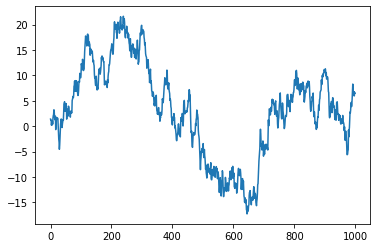

In [22]:
# to save an SVG version of a figure
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
plt.savefig('figpath.svg')

The file type is inferred from the file extension. So if you used .pdf instead, you
would get a PDF. There are a couple of important options that I use frequently for
publishing graphics: dpi, which controls the dots-per-inch resolution, and
bbox_inches, which can trim the whitespace around the actual figure. To get the
same plot as a PNG with minimal whitespace around the plot and at 400 DPI, you
would do

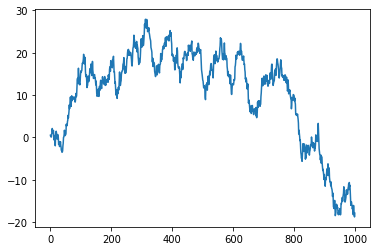

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

fname  : String containing a filepath or a Python file-like object. The figure format is inferred from the file
extension (e.g., .pdf for PDF or .png for PNG)<br>
dpi : The figure resolution in dots per inch; defaults to 100 out of the box but can be configured)<br>
facecolor, edgecolor : The color of the figure background outside of the subplots; 'w' (white), by default)<br>
format  : The explicit file format to use ('png', 'pdf', 'svg', 'ps', 'eps', ...))<br>
bbox_inches  : The portion of the figure to save; if 'tight' is passed, will attempt to trim the empty space around the figure

#### matplotlib Configuration
matplotlib comes configured with color schemes and defaults that are geared primarily
toward preparing figures for publication. Fortunately, nearly all of the default
behavior can be customized via an extensive set of global parameters governing figure
size, subplot spacing, colors, font sizes, grid styles, and so on.<br>
One way to modify the configuration programmatically from Python is to use the rc method

In [24]:
plt.rc('figure', figsize=(10, 10))

The first argument to rc is the component you wish to customize, such as 'figure',
'axes', 'xtick', 'ytick', 'grid', 'legend', or many others. After that can follow a
sequence of keyword arguments indicating the new parameters. An easy way to write
down the options in your program is as a dict

In [25]:
font_options = {'family' : 'monospace', 'weight' : 'bold', 'size' : '22'}
plt.rc('font', **font_options)

In [ ]:
matplotlib comes
with a configuration file matplotlibrc in the matplotlib/mpl-data directory. If you customize
this file and place it in your home directory titled .matplotlibrc, it will be
loaded each time you use matplotlib.